In [6]:
import sympy as sp
import numpy as np

sp.init_printing()

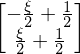

In [7]:
xi, L, A, E = sp.symbols("xi L A E")
Nue = sp.Matrix([(1-xi)/2, (1+xi)/2])
Nue

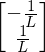

In [8]:
Bue=sp.diff(Nue,xi)*2/L
Bue

In [9]:
KeTRUSS1D = sp.lambdify((A,E,L),A*E*sp.integrate(Bue*(Bue.T),(xi,-1,1))*L/2)
print(KeTRUSS1D(A,E,L))

[[A*E/L -A*E/L]
 [-A*E/L A*E/L]]


![03_02](03_02.png)

Adatok megadása

In [10]:
A1=50
A2=20

E1=100e3
E2=200e3


L=2e3

FT=60e3

Elem-csomópont összerendelések tárolása az `en` mátrixban

In [11]:
en=np.array([
    [1,3],
    [2,3],
    [3,4],
    [3,5]]) - 1

Elemi merevségi mátrixok

In [12]:
Ke1 = KeTRUSS1D(A1,E1,L)
Ke2 = KeTRUSS1D(A1,E1,L)
Ke3 = KeTRUSS1D(A1,E1,L)
Ke4 = KeTRUSS1D(A2,E2,2*L)

Globális merevségi mátrix megadása során első lépésben egy zérus elemekkel
kitöltött mátrixot hozunk létre, majd a megfelelő helyekre betesszül az
egyes elemem merevségi mátrixainak elemeit.

In [13]:
KG=np.zeros((5,5))
KG

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

Egy lehetséges leprogramozása ennek az alábbiakban látható,
ahol felhasználjuk az elem-csomópont összerendlés mátrixot:

[np.ix_](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ix_.html)

Az 1-es elem merevségi mátrixának elhelyezése
a globális merevségi mátrixban:

In [14]:
elemSzam=1
KG[np.ix_(en[elemSzam-1],en[elemSzam-1])] += Ke1
KG

array([[ 2500.,     0., -2500.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.],
       [-2500.,     0.,  2500.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.]])

Az 2-es elem merevségi mátrixának elhelyezése
a globális merevségi mátrixban:

In [15]:
elemSzam=2
KG[np.ix_(en[elemSzam-1],en[elemSzam-1])] += Ke2
KG

array([[ 2500.,     0., -2500.,     0.,     0.],
       [    0.,  2500., -2500.,     0.,     0.],
       [-2500., -2500.,  5000.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.]])

Az 3-es elem merevségi mátrixának elhelyezése
a globális merevségi mátrixban:

In [16]:
elemSzam=3
KG[np.ix_(en[elemSzam-1],en[elemSzam-1])] += Ke3
KG

array([[ 2500.,     0., -2500.,     0.,     0.],
       [    0.,  2500., -2500.,     0.,     0.],
       [-2500., -2500.,  7500., -2500.,     0.],
       [    0.,     0., -2500.,  2500.,     0.],
       [    0.,     0.,     0.,     0.,     0.]])

Az 4-es elem merevségi mátrixának elhelyezése
a globális merevségi mátrixban:

In [17]:
elemSzam=4
KG[np.ix_(en[elemSzam-1],en[elemSzam-1])] += Ke4
KG

array([[ 2500.,     0., -2500.,     0.,     0.],
       [    0.,  2500., -2500.,     0.,     0.],
       [-2500., -2500.,  8500., -2500., -1000.],
       [    0.,     0., -2500.,  2500.,     0.],
       [    0.,     0., -1000.,     0.,  1000.]])

Tehát a globális merevségi mátrix:

In [18]:
KG

array([[ 2500.,     0., -2500.,     0.,     0.],
       [    0.,  2500., -2500.,     0.,     0.],
       [-2500., -2500.,  8500., -2500., -1000.],
       [    0.,     0., -2500.,  2500.,     0.],
       [    0.,     0., -1000.,     0.,  1000.]])

A globális tehervektor:

In [19]:
FG = np.zeros(5)
FG[2 - 1] += FT

A kondenzált merevségi mátrixot és a kondenzált tehervektort megkapjuk a kényszerekkel ellátott szabadságfokokhoz tartozó sorok és oszlopok törlésével:

(megtartjuk a maradék részt)

In [20]:
szabad = [1,2]

A kondenzált merevségi mátrixot megkapjuk az **első** és **második** sorok/oszlopok megtartásával:

In [21]:
print(np.ix_(szabad,szabad))

(array([[1],
       [2]]), array([[1, 2]]))


In [22]:
KGkond = KG[np.ix_(szabad,szabad)]
KGkond

array([[ 2500., -2500.],
       [-2500.,  8500.]])

A kondezált tehervektort megkapjuk az **első** és **második** sor megtartásával:

In [23]:
FGkond = FG[np.ix_(szabad)]
FGkond

array([ 60000.,      0.])

In [24]:
# a teljes lineáris egyenletrendszer alulhatározott (~0-val osztás)
np.linalg.solve(KG,FG)

array([ -3.10899383e+17,  -3.10899383e+17,  -3.10899383e+17,
        -3.10899383e+17,  -3.10899383e+17])

Megoldás az ismeretlen elmozdulásokra

In [25]:
Umego = np.linalg.solve(KGkond,FGkond)
Umego

array([ 34.,  10.])

Tehát a teljes globális csomóponti elmozdulásvektor:

In [26]:
UG = np.zeros(5)
UG[np.ix_(szabad)] += Umego
UG

array([  0.,  34.,  10.,   0.,   0.])

Eredmények megjelenítése

[matplotlib.patches](https://matplotlib.org/api/patches_api.html)

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

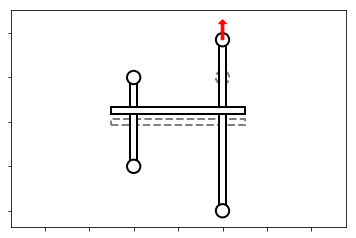

In [28]:
nagy = 50
R = 300

plt.figure()
ax = plt.gca()
ax.set_xticklabels([])
ax.set_yticklabels([])
## eredeti konfiguráció
# rudak
ax.add_patch(mpatches.Rectangle((-L-R/2,-L),R,L,
                                fc = (1,1,1,1),ec = (0.5,0.5,0.5,1), ls = "--", lw = 2))
ax.add_patch(mpatches.Rectangle((-L-R/2,-2*L),R,L,
                                fc = (1,1,1,1),ec = (0.5,0.5,0.5,1), ls = "--", lw = 2))
ax.add_patch(mpatches.Rectangle((L-R/2,-L),R,L,
                                fc = (1,1,1,1),ec = (0.5,0.5,0.5,1), ls = "--", lw = 2))
ax.add_patch(mpatches.Rectangle((L-R/2,-3*L),R,2*L,
                                fc = (1,1,1,1),ec = (0.5,0.5,0.5,1), ls = "--", lw = 2))
# # csomópontok
ax.add_patch(mpatches.Circle((L,0),R,
                             fc = (1,1,1,1),ec = (0.5,0.5,0.5,1),ls = "--", lw = 2))
ax.add_patch(mpatches.Rectangle((-1.5*L,-L - R/2), 3*L, R,
                                fc = (1,1,1,1),ec = (0.5,0.5,0.5,1),ls = "--", lw = 2))

## elmozdult állapot
# rudak
ax.add_patch(mpatches.Rectangle((-L-R/2,-L + nagy*UG[2]),R,L + nagy*(UG[0] - UG[2]),
                                fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Rectangle((-L-R/2,-2*L + nagy*UG[3]),R,L + nagy*(UG[2] - UG[3]),
                                fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Rectangle((L-R/2,-L + nagy*UG[2]),R,L + nagy*(UG[1] - UG[2]),
                                fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Rectangle((L-R/2,-L -2*L + nagy*UG[4]),R,2*L + nagy*(UG[2] - UG[4]),
                                fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))

# csomópontok
ax.add_patch(mpatches.Circle((-L,0+nagy*UG[0]),R,
                             fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Circle((L,nagy*UG[1]),R,
                             fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Rectangle((-1.5*L,-L - R/2 + nagy*UG[2]),3*L,R,
                                fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Circle((-L,-L-L),R,
                             fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
ax.add_patch(mpatches.Circle((L,-L - 2*L),R,
                             fc = (1,1,1,1),ec = (0,0,0,1), lw = 2))
# terhelés
ax.add_patch(mpatches.Arrow(L,nagy*UG[1],0,3*R,
                            fc = (1,0,0,1),ec = (1,0,0,1), lw = 1, width = 2*R))
plt.axis("equal")
plt.show()

A teljes csomóponti terhelésvektor 
$\mathbf{F}_\mathrm{TOT} = \mathbf{F}_\mathrm{REAK} + \mathbf{F}_\mathrm{KÜL}$:

In [29]:
FTOT = np.dot(KG,UG)
FTOT

array([-25000.,  60000.,      0., -25000., -10000.])

In [30]:
FREAK = FTOT - FG
FREAK

array([-25000.,      0.,      0., -25000., -10000.])

Az egyes elemekhez tartozó lokális elmozdulásvektorok:

In [31]:
Ue1 = UG[en[0]]
Ue1

array([  0.,  10.])

In [32]:
Ue2 = UG[en[1]]
Ue2

array([ 34.,  10.])

In [33]:
Ue3 = UG[en[2]]
Ue3

array([ 10.,   0.])

In [34]:
Ue4 = UG[en[3]]
Ue4

array([ 10.,   0.])

Az egyes elemekhez tartozó lokális tehervektor:

In [35]:
Fe1 = np.dot(Ke1,Ue1)
Fe1

array([-25000.,  25000.])

In [36]:
Fe2 = np.dot(Ke2,Ue2)
Fe2

array([ 60000., -60000.])

In [37]:
Fe3 = np.dot(Ke3,Ue3)
Fe3

array([ 25000., -25000.])

In [38]:
Fe4 = np.dot(Ke4,Ue4)
Fe4

array([ 10000., -10000.])

Tehát a normál igénybevételek:

In [39]:
N1 = Fe1[0]
N1

In [40]:
N2 = Fe2[0]
N2

In [41]:
N3 = Fe3[0]
N3

In [42]:
N4 = Fe4[0]
N4

Vagyis mindegyik rúd nyomó igénybevétel alatt van.

A rudakban ébredő feszültség:

In [43]:
sig1 = N1/A1
sig1

In [44]:
sig2 = N2/A1
sig2

In [45]:
sig3 = N3/A1
sig3

In [46]:
sig4 = N3/A2
sig4

A rudak alapváltozásai:

In [47]:
eps1 = sig1/E1
eps1

In [48]:
eps2 = sig2/E1
eps2

In [49]:
eps3 = sig3/E1
eps3

In [50]:
eps4 = sig4/E2
eps4